# Set up

In [1]:
# update path with data dir
import sys
sys.path.append('../data/')

In [28]:
import player_data as player
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from numpy import linspace

# Get data

In [3]:
file_name = 'csvs/element_gameweek_' + datetime.today().strftime('%Y-%m-%d') + '.csv'

In [4]:
try:
    element_gameweek_df = pd.read_csv(file_name)
except:
    element_gameweek_df = player.get_element_gameweek_df()
    element_gameweek_df.to_csv(file_name)

In [5]:
current_event = 26
element_types = [2, 3, 4]
threshold_minutes = 1

In [6]:
element_gameweek_df =\
element_gameweek_df[
    (element_gameweek_df['event'] <= current_event)
    & (element_gameweek_df['element_type'].isin(element_types))
    & (element_gameweek_df['minutes'] >= threshold_minutes)
]

# Distribution of assists for full matches

## Overall

In [7]:
full_matches_df = element_gameweek_df.copy()
full_matches_df=\
full_matches_df.copy()[
    (full_matches_df['minutes'] >= 85)
]

In [8]:
full_matches_df['assists'].describe()

count    3952.000000
mean        0.110071
std         0.343106
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: assists, dtype: float64

In [24]:
full_matches_mean = full_matches_df['assists'].mean()
full_matches_std = full_matches_df['assists'].std()
full_matches_min = full_matches_df['assists'].min()
full_matches_max = full_matches_df['assists'].max()
full_matches_mean, full_matches_std, full_matches_min, full_matches_max

(0.11007085020242915, 0.3431062345259488, 0, 3)

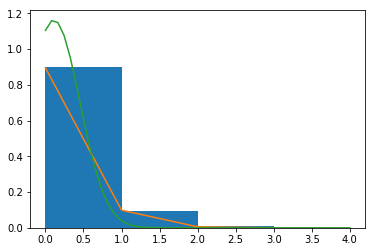

In [33]:
plt.figure()
plt.hist(full_matches_df['assists'], bins=range(full_matches_min, full_matches_max+2), density=True)
plt.plot(range(full_matches_min, full_matches_max+1),
         poisson.pmf(range(full_matches_min, full_matches_max+1), full_matches_mean))
plt.plot(linspace(full_matches_min, full_matches_max+1),
         norm.pdf(linspace(full_matches_min, full_matches_max+1), full_matches_mean, full_matches_std))
plt.show()

## By element type

### Defender

In [11]:
full_matches_def_df = element_gameweek_df.copy()
full_matches_def_df=\
full_matches_def_df.copy()[
    (full_matches_def_df['minutes'] >= 85)
    & (full_matches_def_df['element_type'] == 2)
]

In [12]:
full_matches_def_df['assists'].describe()

count    2000.000000
mean        0.072000
std         0.277226
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: assists, dtype: float64

In [13]:
full_matches_def_mean = full_matches_def_df['assists'].mean()
full_matches_def_min = full_matches_def_df['assists'].min()
full_matches_def_max = full_matches_def_df['assists'].max()
full_matches_def_mean, full_matches_def_min, full_matches_def_max

(0.072, 0, 3)

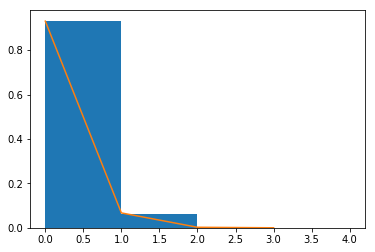

In [14]:
plt.figure()
plt.hist(full_matches_def_df['assists'], bins=range(full_matches_def_min, full_matches_def_max+2), density=True)
plt.plot(range(full_matches_def_min, full_matches_def_max+1),
         poisson.pmf(range(full_matches_def_min, full_matches_def_max+1), full_matches_def_mean))
plt.show()

### Midfielder

In [15]:
full_matches_mid_df = element_gameweek_df.copy()
full_matches_mid_df=\
full_matches_mid_df.copy()[
    (full_matches_mid_df['minutes'] >= 85)
    & (full_matches_mid_df['element_type'] == 3)
]

In [16]:
full_matches_mid_df['assists'].describe()

count    1582.000000
mean        0.139697
std         0.388095
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: assists, dtype: float64

In [17]:
full_matches_mid_mean = full_matches_mid_df['assists'].mean()
full_matches_mid_min = full_matches_mid_df['assists'].min()
full_matches_mid_max = full_matches_mid_df['assists'].max()
full_matches_mid_mean, full_matches_mid_min, full_matches_mid_max

(0.13969658659924147, 0, 3)

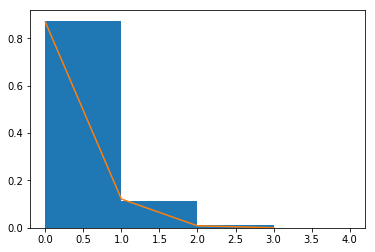

In [18]:
plt.figure()
plt.hist(full_matches_mid_df['assists'], bins=range(full_matches_mid_min, full_matches_mid_max+2), density=True)
plt.plot(range(full_matches_mid_min, full_matches_mid_max+1),
         poisson.pmf(range(full_matches_mid_min, full_matches_mid_max+1), full_matches_mid_mean))
plt.show()

### Striker

In [19]:
full_matches_str_df = element_gameweek_df.copy()
full_matches_str_df=\
full_matches_str_df.copy()[
    (full_matches_str_df['minutes'] >= 85)
    & (full_matches_str_df['element_type'] == 4)
]

In [20]:
full_matches_str_df['assists'].describe()

count    370.000000
mean       0.189189
std        0.425338
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: assists, dtype: float64

In [21]:
full_matches_str_mean = full_matches_str_df['assists'].mean()
full_matches_str_min = full_matches_str_df['assists'].min()
full_matches_str_max = full_matches_str_df['assists'].max()
full_matches_str_mean, full_matches_str_min, full_matches_str_max

(0.1891891891891892, 0, 2)

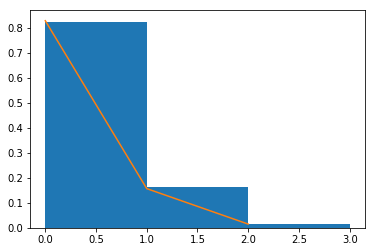

In [22]:
plt.figure()
plt.hist(full_matches_str_df['assists'], bins=range(full_matches_str_min, full_matches_str_max+2), density=True)
plt.plot(range(full_matches_str_min, full_matches_str_max+1),
         poisson.pmf(range(full_matches_str_min, full_matches_str_max+1), full_matches_str_mean))
plt.show()